In [18]:
#Imports
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from matplotlib import style
from datetime import datetime, timedelta

style.use('ggplot')

In [19]:
#Save path
s_path = "/home/marius/Downloads/"

In [20]:
#Importing data
path = "/home/marius/Downloads/mtd_data.csv"
data = pd.read_csv(path)

In [21]:
data["Closed"]

0                       NaN
1                       NaN
2                       NaN
3                       NaN
4                       NaN
5                       NaN
6                       NaN
7                       NaN
8                       NaN
9                       NaN
10                      NaN
11                      NaN
12                      NaN
13                      NaN
14                      NaN
15                      NaN
16                      NaN
17      03-07-2019 19:00:03
18      03-07-2019 19:00:00
19      03-07-2019 17:00:10
20      03-07-2019 19:00:02
21      03-07-2019 15:00:11
22      03-07-2019 12:00:08
23                      NaN
24      02-07-2019 21:00:04
25      03-07-2019 14:00:11
26                      NaN
27      02-07-2019 16:00:07
28      02-07-2019 17:00:04
29                      NaN
               ...         
1529    13-02-2019 23:00:05
1530    13-01-2019 19:00:01
1531    14-01-2019 23:00:07
1532    13-01-2019 02:00:15
1533    13-01-2019 0

In [22]:
#Early visualisation
data.iloc[0]

Number                                   INC836712
Priority                              5 - Planning
Urgency                                    3 - Low
Supplier                                       NaN
State                                      Pending
Solution category                      Explanation
Skills                                         NaN
Severity                                   3 - Low
Resolved                       05-07-2019 11:54:05
Project related                              False
Opened                         04-07-2019 23:59:57
Incident ID                              INC836712
Impact                                     3 - Low
Company                                       4602
Close code                    Solved (Permanently)
Incident state                            Resolved
Reason for waiting                             NaN
Created                        04-07-2019 23:59:57
Closed                                         NaN
Caused by Change               

In [23]:
#Cleaning planning stage
num_col = ["Priority", "Urgency", "Severity", "Impact"]
for col in (num_col):
    print(col)
    for i in range(len(data)):
        val = data.iloc[i][col]
        val = int(val.split()[0])
        data.set_value([i], col, val)
    print("Finito with " + col)
print("Finito total")

Priority


/home/marius/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Finito with Priority
Urgency
Finito with Urgency
Severity
Finito with Severity
Impact
Finito with Impact
Finito total


In [24]:
np.array(data.iloc[:]["Priority"])

array([5, 5, 5, ..., 5, 4, 4])

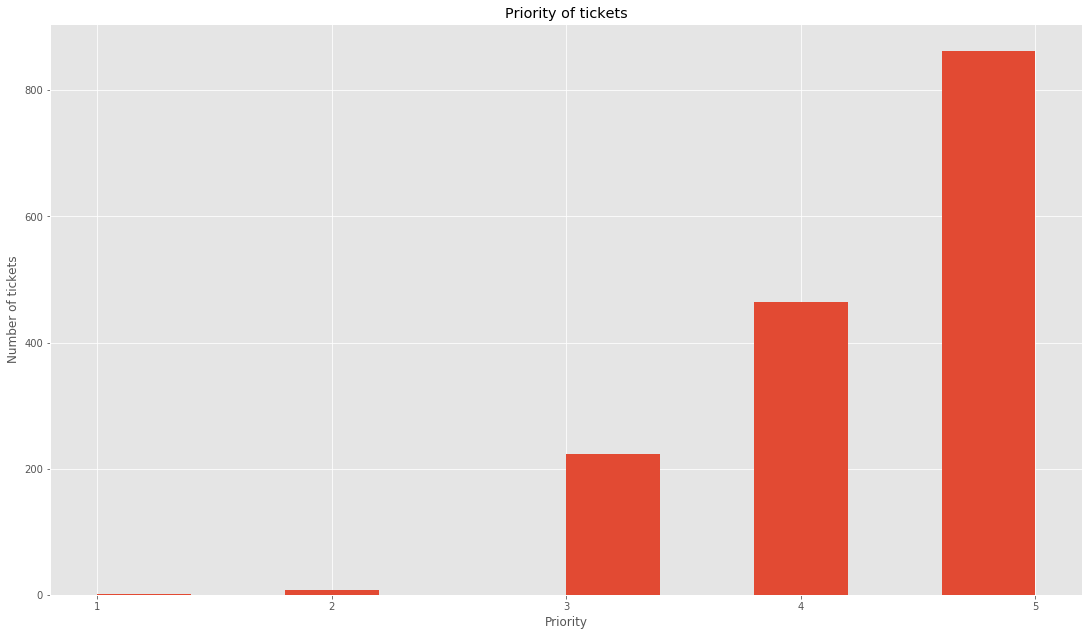

In [134]:
#Priority data histogram

plt.hist(data.iloc[:]["Priority"])
plt.ylabel("Number of tickets")
plt.xlabel("Priority")
plt.xticks([1, 2, 3, 4, 5])
plt.title("Priority of tickets")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig(s_path+'Priority.png', dpi=100)

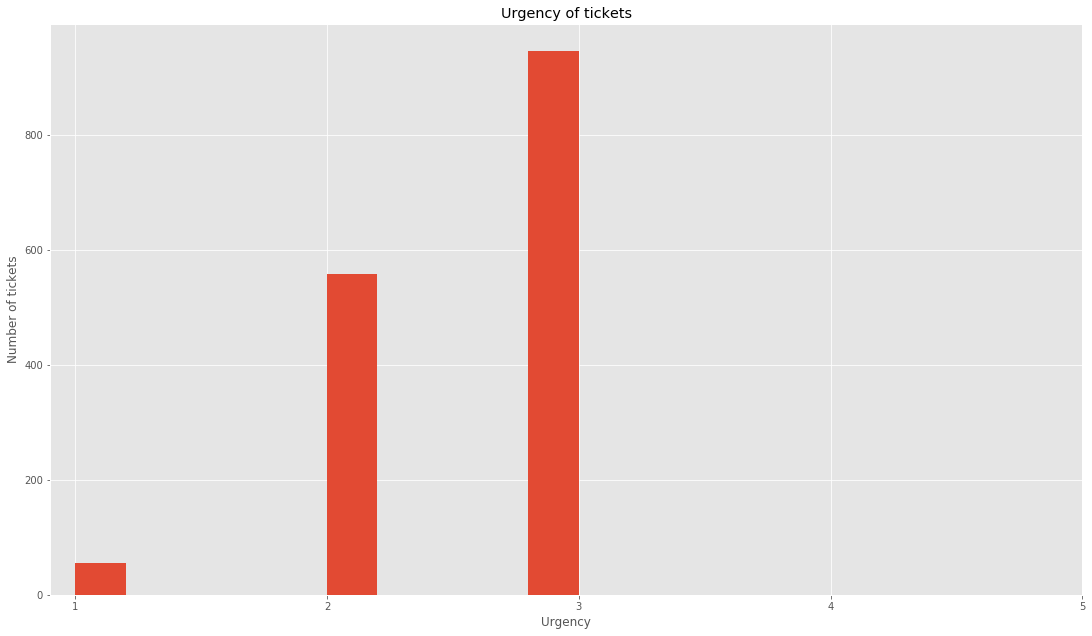

In [135]:
#Urgency histogram
plt.hist(data.iloc[:]["Urgency"])
plt.ylabel("Number of tickets")
plt.xlabel("Urgency")
plt.xticks([1, 2, 3, 4, 5])
plt.title("Urgency of tickets")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig(s_path+'Urgency.png', dpi=100)

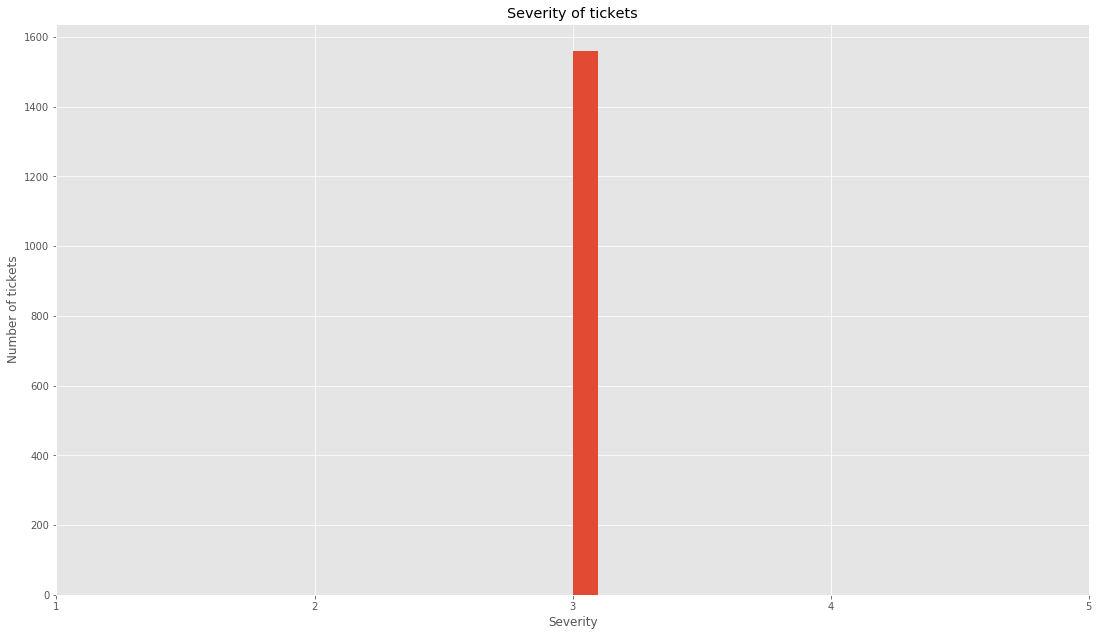

In [136]:
#Severity histogram
plt.hist(data.iloc[:]["Severity"])
plt.ylabel("Number of tickets")
plt.xlabel("Severity")
plt.xticks([1, 2, 3, 4, 5])
plt.title("Severity of tickets")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig(s_path+'Severity.png', dpi=100)

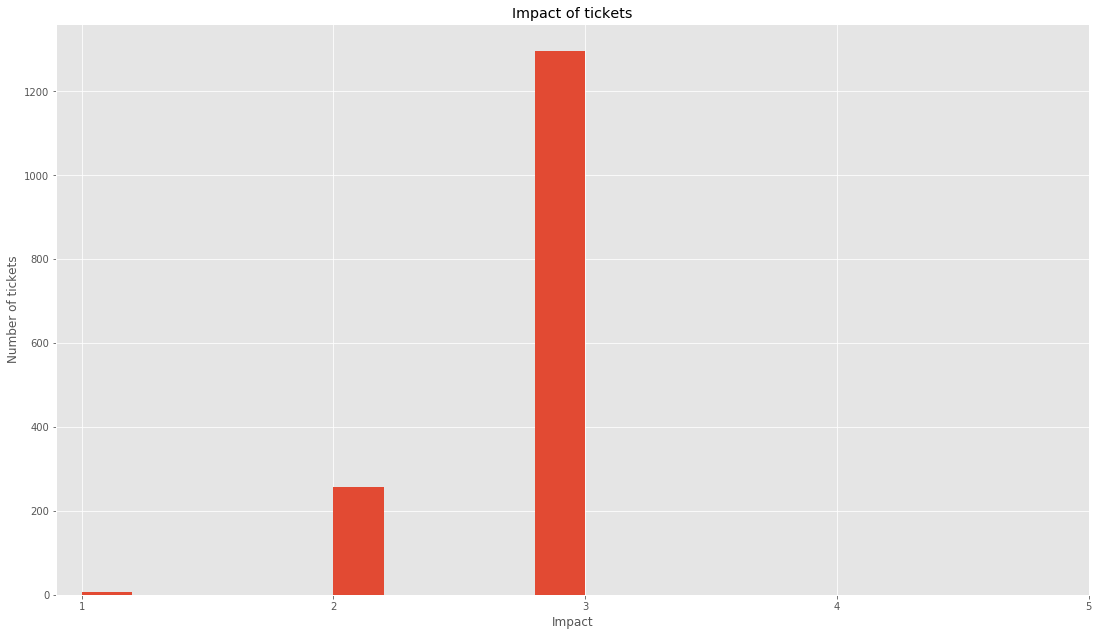

In [137]:
#Impact histogram
plt.hist(data.iloc[:]["Impact"])
plt.ylabel("Number of tickets")
plt.xlabel("Impact")
plt.xticks([1, 2, 3, 4, 5])
plt.title("Impact of tickets")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig(s_path+'Impact.png', dpi=100)

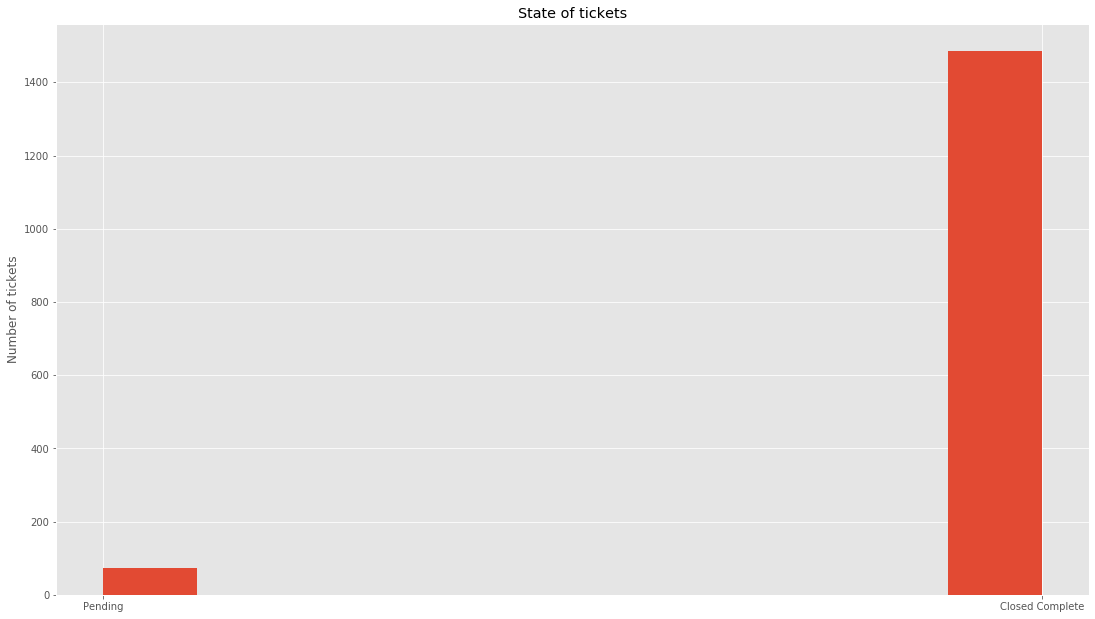

In [138]:
plt.hist(data.iloc[:]["State"])
plt.ylabel("Number of tickets")
plt.title("State of tickets")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig(s_path+'State.png', dpi=100)

In [139]:
data.iloc[:]["Solution category"].head()


0         Explanation
1    Parameter change
2         Explanation
3         Explanation
4                 NaN
Name: Solution category, dtype: object

In [140]:
#Removing nan rows for solution category. They are often flagged as pending.
ind_val = []
for i in range(len(data)):
        val = data.iloc[i]["Solution category"]
        if not isinstance(val, str):
            ind_val += [i]
            print("NaN at index", i)
new_data = data.drop(ind_val)

NaN at index 4
NaN at index 15
NaN at index 26
NaN at index 30
NaN at index 41
NaN at index 43
NaN at index 44
NaN at index 52
NaN at index 53
NaN at index 60
NaN at index 75
NaN at index 102
NaN at index 112
NaN at index 121
NaN at index 131
NaN at index 144
NaN at index 173
NaN at index 200
NaN at index 210
NaN at index 218
NaN at index 236
NaN at index 294
NaN at index 308
NaN at index 323
NaN at index 371
NaN at index 386
NaN at index 425
NaN at index 449
NaN at index 451
NaN at index 517
NaN at index 574
NaN at index 589
NaN at index 692
NaN at index 763
NaN at index 800
NaN at index 937
NaN at index 1355
NaN at index 1372
NaN at index 1535


In [141]:
#Histogram of solution category with correct size.
#plt.hist(new_data.iloc[:]["Solution category"])
#fig = plt.gcf()
#fig.set_size_inches(18.5, 10.5)
#fig.savefig(s_path+'test2png.png', dpi=100)

In [142]:
#Manually getting data for solution categories
dfy = new_data.groupby("Solution category").nunique()
dfy["Number"]
dfx = new_data["Solution category"].unique()
dfx
y = np.array(dfy["Number"])
dfy["Number"]


Solution category
Change Request            125
Data update                71
Explanation              1179
Other ticket               24
Parameter change            1
Permissions                 1
Restart                     2
Software installation       2
Software reset              8
Unsolved                   26
Workaround                 81
Name: Number, dtype: int64

In [143]:
dfx

array(['Explanation', 'Parameter change', 'Unsolved', 'Software reset',
       'Data update', 'Change Request', 'Workaround',
       'Software installation', 'Other ticket', 'Restart', 'Permissions'],
      dtype=object)

# Switching places of values to align y and x

In [144]:
y[2], y[0] = y[0], y[2]

In [145]:
y[4], y[1] = y[1], y[4]
y

array([1179,    1,  125,   24,   71,    1,    2,    2,    8,   26,   81])

In [146]:
y[2], y[9] = y[9], y[2]
y

array([1179,    1,   26,   24,   71,    1,    2,    2,    8,  125,   81])

In [147]:
y[3] = 8
y[4] = 71
y[5] = 125
y[6] = 81
y[7] = 2
y[8] = 24
y[9] = 2
y[10] = 1
y

array([1179,    1,   26,    8,   71,  125,   81,    2,   24,    2,    1])

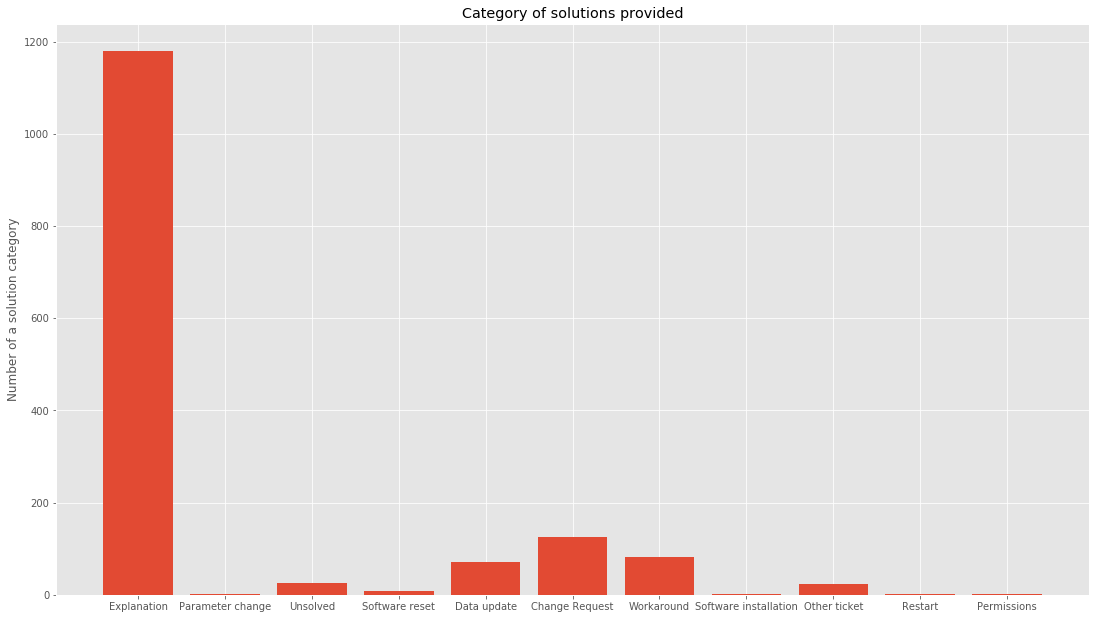

In [148]:
#Plotting solution categories

plt.bar(dfx, y, align='center')
plt.title("Category of solutions provided")
plt.ylabel("Number of a solution category")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig(s_path+'Category.png', dpi=100)

In [149]:
#Turning bools into ints

num_col = ["Project related", "Made SLA", "Hypercare related"]
for col in (num_col):
    print(col)
    for i in range(len(data)):
        val = int(data.iloc[i][col])
        data.set_value([i], col, val)
    print("Finito with " + col)
print("Finito total")

Project related


/home/marius/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Finito with Project related
Made SLA
Finito with Made SLA
Hypercare related
Finito with Hypercare related
Finito total


In [150]:
data.iloc[0]["Project related"]

0

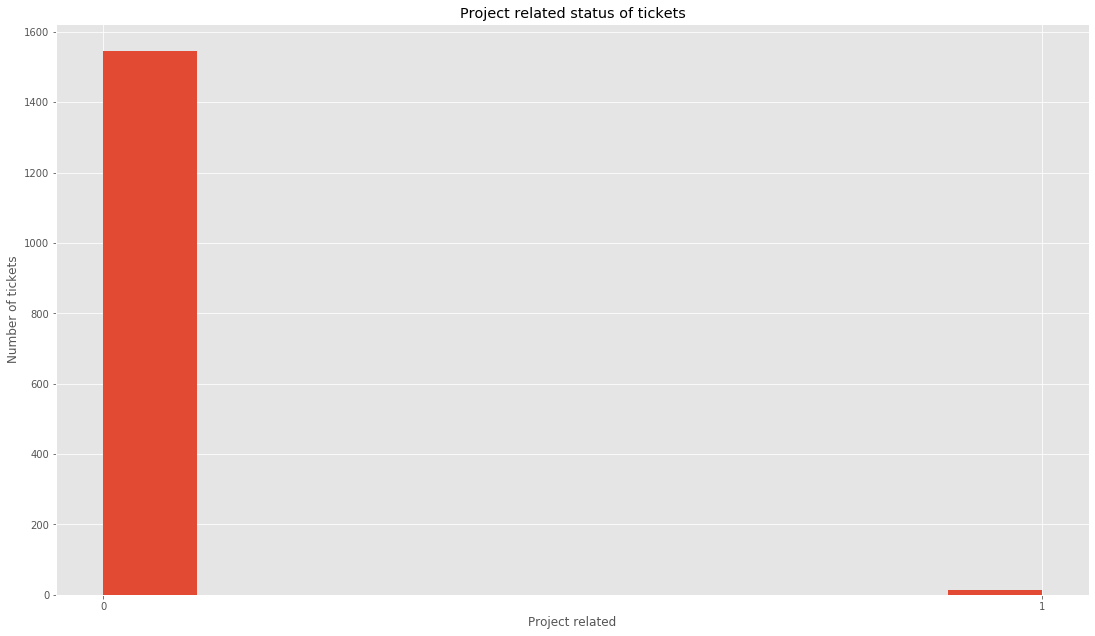

In [151]:
#"Project related" histogram
plt.hist(data.iloc[:]["Project related"])
plt.ylabel("Number of tickets")
plt.xlabel("Project related")
plt.xticks([False, True])
plt.title("Project related status of tickets")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig(s_path+'Project_related.png', dpi=100)

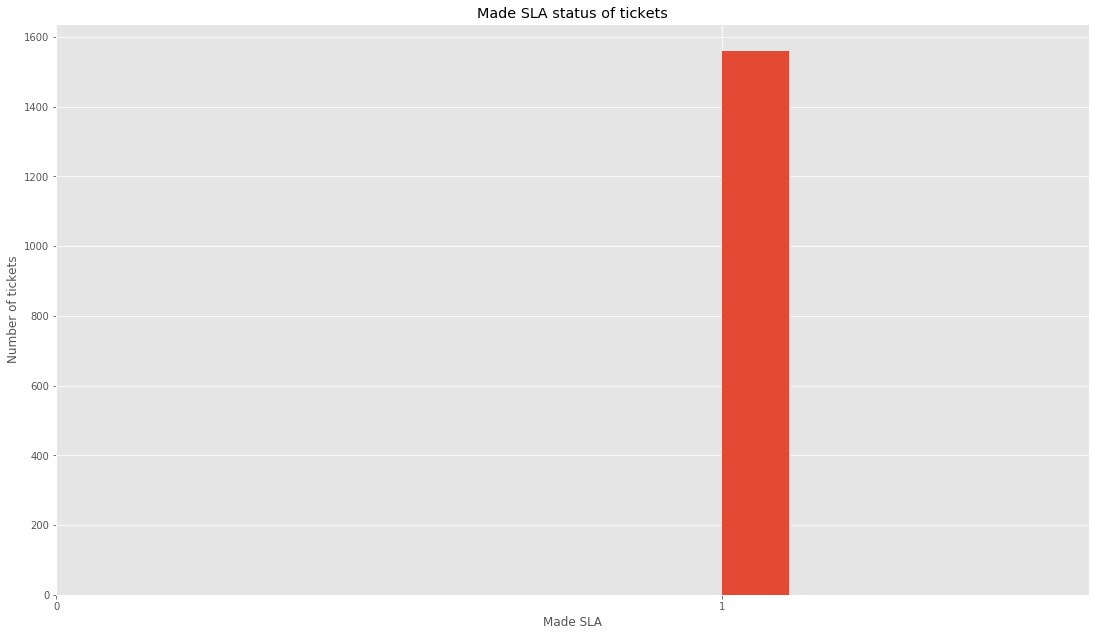

In [152]:
#Made SLA histogram
plt.hist(data.iloc[:]["Made SLA"])
plt.ylabel("Number of tickets")
plt.xlabel("Made SLA")
plt.xticks([False, True])
plt.title("Made SLA status of tickets")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig(s_path+'Made_SLA.png', dpi=100)

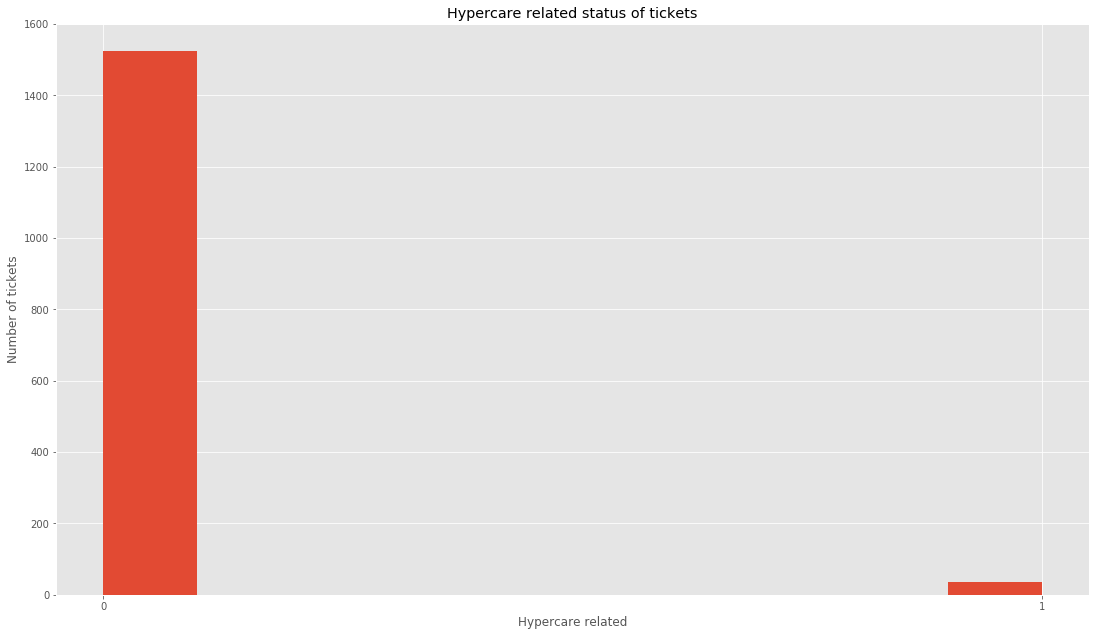

In [153]:
#Hypercare related histogram
plt.hist(data.iloc[:]["Hypercare related"])
plt.ylabel("Number of tickets")
plt.xlabel("Hypercare related")
plt.xticks([False, True])
plt.title("Hypercare related status of tickets")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig(s_path+'Hypercare_related.png', dpi=100)

In [164]:
#Plotting subcategory by first manually getting data
a = data.groupby("Subcategory").nunique()
a["Number"]

Subcategory
Basis issue                    2
Coding issue                  94
Configuration issue           31
Connectivity                   1
Deployment issue               2
Design issue (business)       21
Design issue (technical)      46
Enhancement request           67
Installation                   2
Operating System               2
Peripherals                    1
Permission                     1
Regression impact              1
Server                         1
Service request               29
Software Issue                12
System Administration         10
Technical issue             1231
Training need                  5
Name: Number, dtype: int64

In [162]:
a["Number"]
b = data["Subcategory"].unique()
b

array(['Technical issue', 'Service request', 'Operating System',
       'Coding issue', 'Installation', 'Configuration issue',
       'Software Issue', 'System Administration', 'Connectivity',
       'Enhancement request', 'Design issue (technical)',
       'Design issue (business)', 'Basis issue', 'Training need',
       'Deployment issue', 'Peripherals', 'Regression impact', 'Server',
       'Permission'], dtype=object)

In [165]:
a = np.array(a["Number"])
c = a
c
#a["Number"]

array([   2,   94,   31,    1,    2,   21,   46,   67,    2,    2,    1,
          1,    1,    1,   29,   12,   10, 1231,    5])

In [170]:
c[0] = 1231
c[1] = 29
c[2] = 2
c[3] = 94
c[4] = 2
c[5] = 31
c[6] = 12
c[7] = 10
c[8] = 1
c[9] = 67
c[10] = 46
c[11] = 21
c[12] = 2
c[13] = 5
c[14] = 2
c[15] = 1
c[16] = 1
c[17] = 1
c[18] = 1
len(c)

19

In [178]:
string = "A B C D E F G H I J K L M N O P Q R S"

In [179]:
d = np.array(string.split())
d

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S'], dtype='<U1')

In [189]:
service = b[1]
service

'Service request'

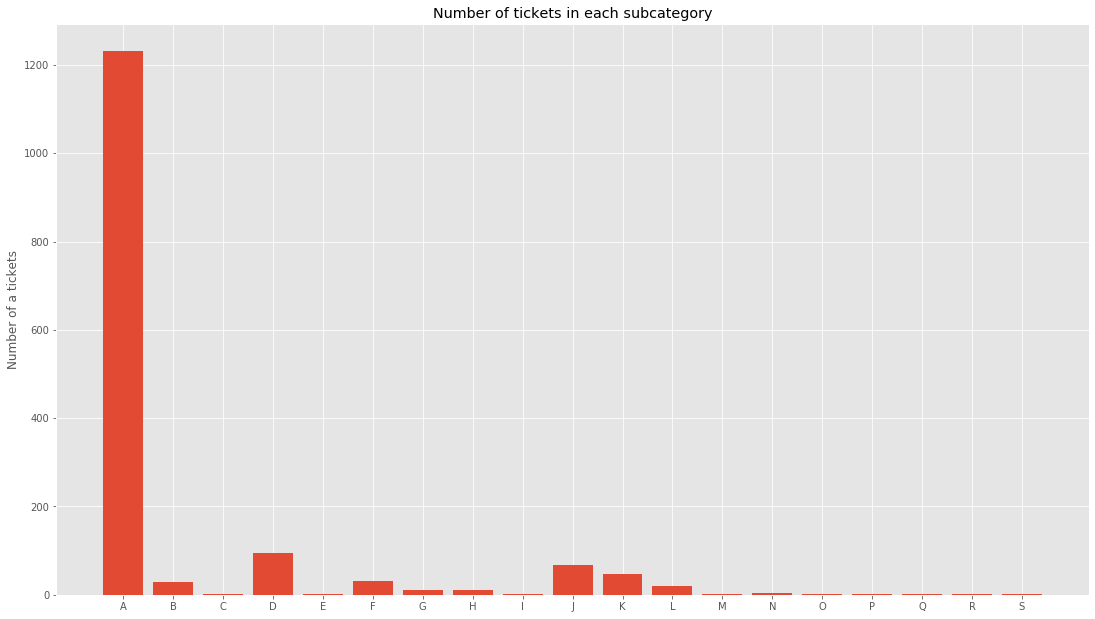

In [198]:
#Plotting Subcategories

plt.bar(d, c, align='center')
plt.title("Number of tickets in each subcategory")
plt.ylabel("Number of a tickets")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig(s_path+'Subcategory.png', dpi=100)

In [199]:
b

array(['Technical issue', 'Service request', 'Operating System',
       'Coding issue', 'Installation', 'Configuration issue',
       'Software Issue', 'System Administration', 'Connectivity',
       'Enhancement request', 'Design issue (technical)',
       'Design issue (business)', 'Basis issue', 'Training need',
       'Deployment issue', 'Peripherals', 'Regression impact', 'Server',
       'Permission'], dtype=object)

In [200]:
#Plotting service area by first manually getting data
a = data.groupby("Service Area").nunique()
a["Number"]

Service Area
SAP SVC - Contact Center         99
SAP SVC - Service Execution     843
SAP SVC - Service Management    617
Name: Number, dtype: int64

In [204]:
b = data["Service Area"].unique()
y = np.array(a["Number"])
b

array(['SAP SVC - Service Management', 'SAP SVC - Service Execution',
       'SAP SVC - Contact Center'], dtype=object)

In [205]:
y

array([ 99, 843, 617])

In [206]:
y[0] = 617
y[1] = 843
y[2] = 99
y

array([617, 843,  99])

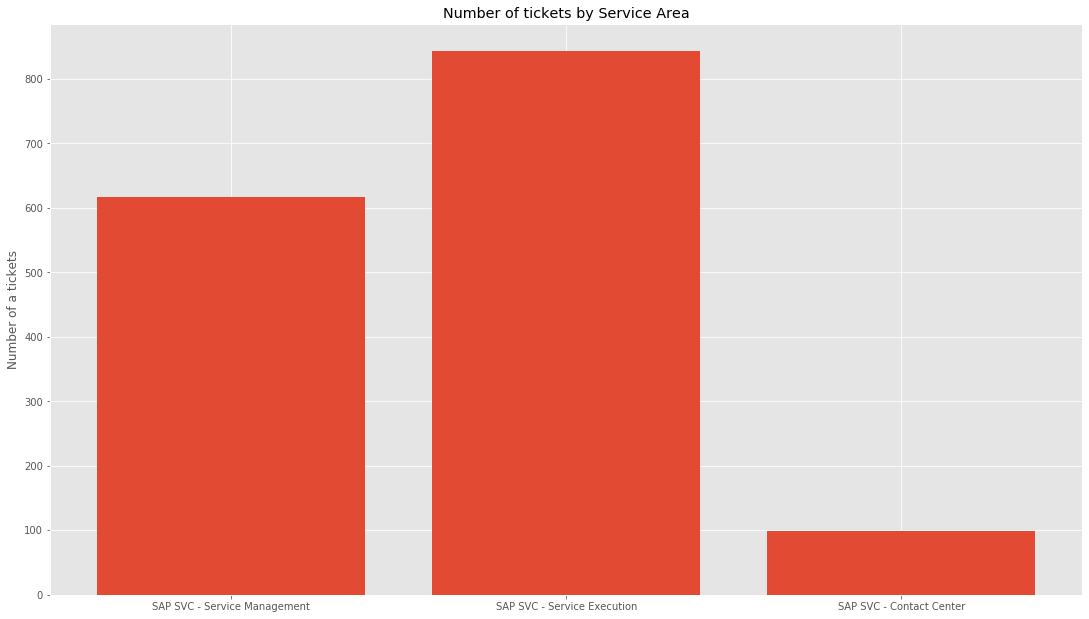

In [207]:
#Plotting Service Area

plt.bar(b, y, align='center')
plt.title("Number of tickets by Service Area")
plt.ylabel("Number of a tickets")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig(s_path+'Service_Area.png', dpi=100)

In [208]:
a = data.groupby("Assignment group").nunique()
a["Number"]

Assignment group
ENT-IS-MOB-IFA       1
ENT-SAP-FIN          1
ENT-SAP-SAM          3
ENT-SAP-SCM          1
ENT-SAP-SCM-DOM      1
ENT-SAP-SCM-PLA      1
ENT-SAP-SCM-SOU      1
ENT-SAP-SVC        265
ENT-SAP-SVC-COC     84
ENT-SAP-SVC-EXE    722
ENT-SAP-SVC-MAN    479
Name: Number, dtype: int64

In [211]:
b = data["Assignment group"].unique()
b = np.delete(b, [4, 5, 6, 7, 8, 9, 10])
b

array(['ENT-SAP-SVC-MAN', 'ENT-SAP-SVC-EXE', 'ENT-SAP-SVC-COC',
       'ENT-SAP-SVC'], dtype=object)

In [216]:
a = np.array(a["Number"])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [220]:
a = a[7:]

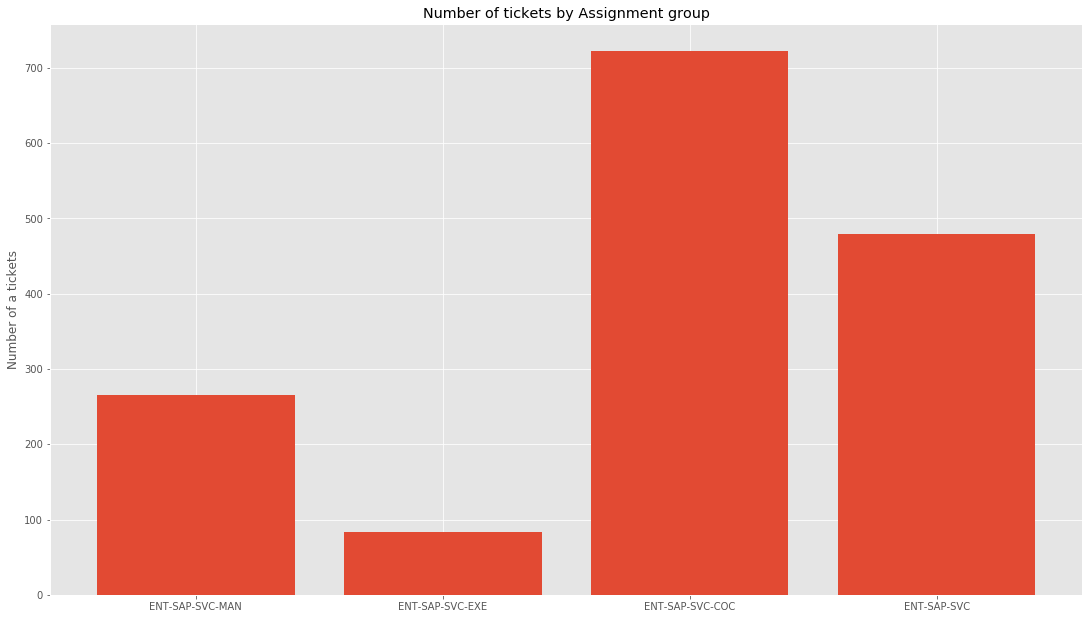

In [221]:
#Plotting Assignment group

plt.bar(b, a, align='center')
plt.title("Number of tickets by Assignment group")
plt.ylabel("Number of a tickets")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig(s_path+'Assignment group.png', dpi=100)

In [ ]:
#Setup for finding delta time in seconds

data.iloc[0]
FMT = '%d-%m-%Y %H:%M:%S'
t1 = datetime.strptime(data.iloc[0]["Resolved"], FMT)
t2 = datetime.strptime(data.iloc[1]["Resolved"], FMT)
tdelta = datetime.strptime(data.iloc[0]["Resolved"], FMT) - datetime.strptime(data.iloc[1]["Resolved"], FMT)
tdelta

In [ ]:
instance_list = data.dtypes.index
instance_list[3:]


In [223]:
#Counting number of tickets with problem number
ind_val = []
for i in range(len(data)):
        val = data.iloc[i]["Problem number"]
        if not isinstance(val, str):
            ind_val += [i]
            print("NaN at index", i)


NaN at index 0
NaN at index 1
NaN at index 2
NaN at index 3
NaN at index 4
NaN at index 5
NaN at index 6
NaN at index 7
NaN at index 8
NaN at index 9
NaN at index 10
NaN at index 11
NaN at index 12
NaN at index 13
NaN at index 14
NaN at index 15
NaN at index 16
NaN at index 17
NaN at index 18
NaN at index 19
NaN at index 20
NaN at index 21
NaN at index 22
NaN at index 23
NaN at index 24
NaN at index 25
NaN at index 26
NaN at index 27
NaN at index 28
NaN at index 29
NaN at index 31
NaN at index 32
NaN at index 33
NaN at index 34
NaN at index 35
NaN at index 36
NaN at index 37
NaN at index 38
NaN at index 41
NaN at index 42
NaN at index 43
NaN at index 44
NaN at index 45
NaN at index 46
NaN at index 49
NaN at index 50
NaN at index 52
NaN at index 53
NaN at index 54
NaN at index 55
NaN at index 57
NaN at index 58
NaN at index 62
NaN at index 63
NaN at index 64
NaN at index 65
NaN at index 66
NaN at index 67
NaN at index 70
NaN at index 71
NaN at index 72
NaN at index 73
NaN at index 75
Na

NaN at index 1266
NaN at index 1267
NaN at index 1270
NaN at index 1271
NaN at index 1274
NaN at index 1277
NaN at index 1280
NaN at index 1281
NaN at index 1282
NaN at index 1284
NaN at index 1285
NaN at index 1286
NaN at index 1287
NaN at index 1289
NaN at index 1291
NaN at index 1293
NaN at index 1294
NaN at index 1297
NaN at index 1301
NaN at index 1302
NaN at index 1307
NaN at index 1308
NaN at index 1309
NaN at index 1313
NaN at index 1315
NaN at index 1320
NaN at index 1321
NaN at index 1325
NaN at index 1326
NaN at index 1328
NaN at index 1329
NaN at index 1330
NaN at index 1331
NaN at index 1334
NaN at index 1335
NaN at index 1336
NaN at index 1338
NaN at index 1340
NaN at index 1341
NaN at index 1342
NaN at index 1345
NaN at index 1348
NaN at index 1349
NaN at index 1351
NaN at index 1355
NaN at index 1358
NaN at index 1360
NaN at index 1361
NaN at index 1362
NaN at index 1364
NaN at index 1368
NaN at index 1369
NaN at index 1372
NaN at index 1373
NaN at index 1376
NaN at ind

In [224]:
a = [len(data)-len(ind_val), len(ind_val)]
b = ["False", "True"]

[679, 880]

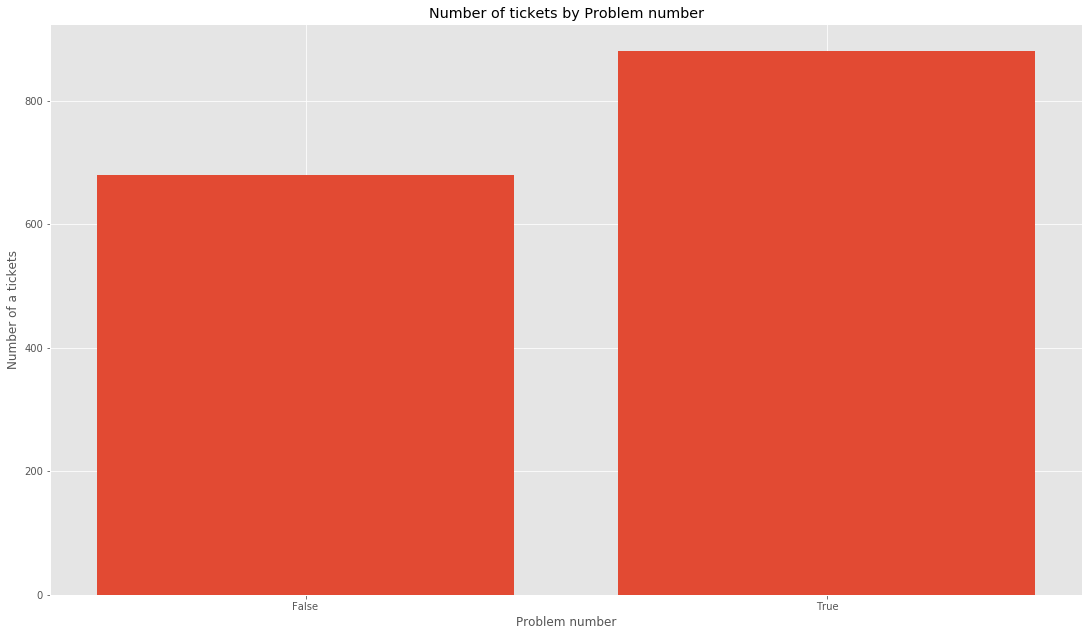

In [226]:
#Plotting Assignment group

plt.bar(b, a, align='center')
plt.title("Number of tickets by Problem number")
plt.ylabel("Number of a tickets")
plt.xlabel("Problem number")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig(s_path+'Problem_number.png', dpi=100)

In [300]:
#Plotting function
def plot_bar(x, y, category):
    plt.bar(x, y, align='center')
    plt.title("Number of tickets by " + category)
    plt.ylabel("Number of a tickets")
    plt.xlabel(category)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    fig.savefig(s_path+category+'.png', dpi=100)

In [254]:
y = data.groupby("Unit").nunique()
y["Number"]

Unit
101.0     301
103.0       3
105.0      21
106.0      41
201.0      48
203.0       7
208.0       5
209.0       6
214.0      21
215.0      99
301.0      10
501.0      54
502.0       3
701.0       7
801.0      59
802.0       3
804.0       4
1001.0      2
1005.0    144
1007.0      5
1010.0      8
1012.0     48
1013.0      2
1014.0      3
1401.0     36
1403.0     12
2501.0      8
2805.0     80
2811.0     11
4005.0     68
4602.0    390
4603.0      6
Name: Number, dtype: int64

In [255]:
y = np.array(y["Number"])
y

array([301,   3,  21,  41,  48,   7,   5,   6,  21,  99,  10,  54,   3,
         7,  59,   3,   4,   2, 144,   5,   8,  48,   2,   3,  36,  12,
         8,  80,  11,  68, 390,   6])

In [267]:
x = data["Unit"].unique()
x

array([4602.,  501.,  105., 4603.,  101.,  215., 1005., 4005., 2805.,
       1012., 2501.,  801.,  802.,  214., 1403.,  103.,  701.,  208.,
        106.,  209.,  201., 1401.,  301.,  203., 1010., 1014.,   nan,
       1013., 2811.,  804.,  502., 1007., 1001.])

In [268]:
x = np.delete(x, [26])
np.array(x)

array([4602.,  501.,  105., 4603.,  101.,  215., 1005., 4005., 2805.,
       1012., 2501.,  801.,  802.,  214., 1403.,  103.,  701.,  208.,
        106.,  209.,  201., 1401.,  301.,  203., 1010., 1014., 1013.,
       2811.,  804.,  502., 1007., 1001.])

In [ ]:
x.sort()

In [277]:
x = x.astype(str)
x

array(['101', '103', '105', '106', '201', '203', '208', '209', '214',
       '215', '301', '501', '502', '701', '801', '802', '804', '1001',
       '1005', '1007', '1010', '1012', '1013', '1014', '1401', '1403',
       '2501', '2805', '2811', '4005', '4602', '4603'], dtype='<U21')

In [272]:
len(x)

32

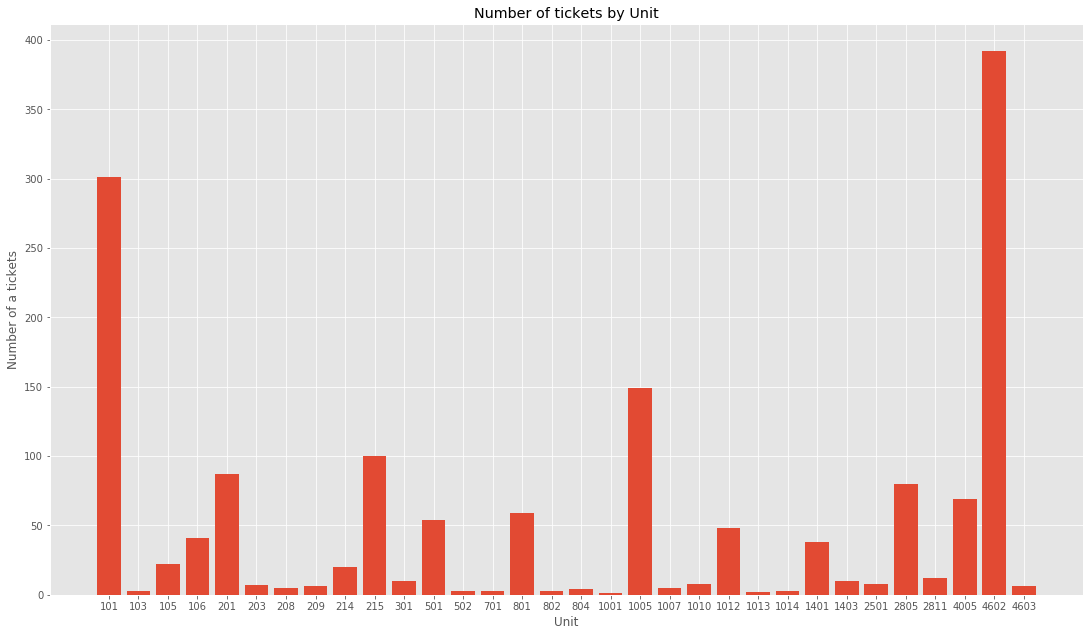

In [303]:
plt.bar(x, y, align='center')
plt.title("Number of tickets by Unit")
plt.ylabel("Number of a tickets")
plt.xlabel("Unit")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig(s_path+'Unit.png', dpi=100)

In [289]:
y = data.groupby("Company").nunique()
y["Number"]

Company
101     301
103       3
105      22
106      41
201      87
203       7
208       5
209       6
214      20
215     100
301      10
501      54
502       3
701       3
801      59
802       3
804       4
1001      1
1005    149
1007      5
1010      8
1012     48
1013      2
1014      3
1401     38
1403     10
2501      8
2805     80
2811     12
4005     69
4602    392
4603      6
Name: Number, dtype: int64

In [290]:
y = np.array(y["Number"])
y

array([301,   3,  22,  41,  87,   7,   5,   6,  20, 100,  10,  54,   3,
         3,  59,   3,   4,   1, 149,   5,   8,  48,   2,   3,  38,  10,
         8,  80,  12,  69, 392,   6])

In [291]:
x = data["Company"].unique()
x

array([4602,  501,  105, 4603,  101,  215, 1005, 4005, 2805, 1012, 2501,
        801,  802,  214, 1403,  103,  701,  208,  106,  209,  201, 1401,
        301,  203, 1010, 1014, 1013, 2811,  804,  502, 1007, 1001])

In [292]:
x.sort()
x

array([ 101,  103,  105,  106,  201,  203,  208,  209,  214,  215,  301,
        501,  502,  701,  801,  802,  804, 1001, 1005, 1007, 1010, 1012,
       1013, 1014, 1401, 1403, 2501, 2805, 2811, 4005, 4602, 4603])

In [297]:
x = x.astype(str)

In [294]:
len(x)-len(y)

0

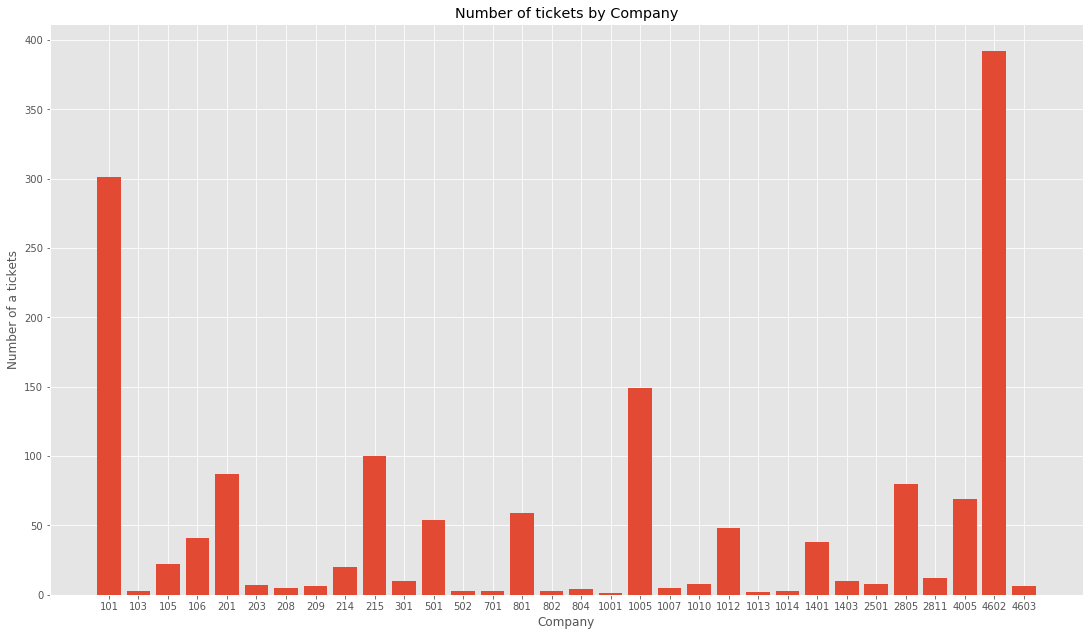

In [301]:
plot_bar(x, y, "Company")

In [28]:
#Function for turning the date into the right format

def date_func(datestring):
    FMT = '%d-%m-%Y %H:%M:%S'
    t1 = datetime.strptime(datestring, FMT)
    return t1


In [43]:
#Removing nans in Opened and Resolved columns

ind_val = []
cat = ["Opened", "Resolved"]
for col in cat:
    for i in range(len(data)):
            val = data.iloc[i][col]
            if not isinstance(val, str):
                ind_val += [i]
                print("NaN at index", i)
list(set(ind_val))
t_data = data.drop(ind_val)

NaN at index 4
NaN at index 15
NaN at index 26
NaN at index 30
NaN at index 41
NaN at index 43
NaN at index 44
NaN at index 52
NaN at index 53
NaN at index 60
NaN at index 75
NaN at index 102
NaN at index 112
NaN at index 121
NaN at index 131
NaN at index 144
NaN at index 173
NaN at index 200
NaN at index 210
NaN at index 218
NaN at index 236
NaN at index 294
NaN at index 308
NaN at index 323
NaN at index 371
NaN at index 386
NaN at index 425
NaN at index 449
NaN at index 451
NaN at index 517
NaN at index 574
NaN at index 589
NaN at index 692
NaN at index 763
NaN at index 800
NaN at index 937
NaN at index 1372
NaN at index 1535


In [44]:
#Creating new column with time spent to complete ticket
lis = ["Resolved", "Opened"]
for col in lis:
    t_data[col] = t_data[col].map(lambda col: date_func(col))

In [45]:
t_data["Completion Time"] = t_data["Resolved"] - t_data["Opened"] 

In [63]:
t_data["Completion Time"][0].total_seconds()

t_data["Completion Time"] = t_data["Completion Time"].map(lambda col: float(col.total_seconds()/3600))

AttributeError: 'numpy.int64' object has no attribute 'total_seconds'

In [67]:
t_data["Completion Time"]

0         11
1          1
2          0
3          0
5         19
6          1
7          1
8         44
9          2
10         0
11         1
12        14
13        16
14        82
16         3
17         0
18         1
19         1
20         4
21         0
22        12
23        90
24         1
25        19
27         0
28        18
29       189
31         1
32        17
33         0
        ... 
1528     989
1529     765
1530      19
1531      47
1532       2
1533       3
1534       2
1536       3
1537       0
1538       3
1539      59
1540       0
1541       2
1542     112
1543    1071
1544       0
1545     147
1546       1
1547       7
1548       0
1549       3
1550       1
1551       0
1552       0
1553     710
1554      15
1555     134
1556      23
1557       1
1558    1142
Name: Completion Time, Length: 1521, dtype: int64

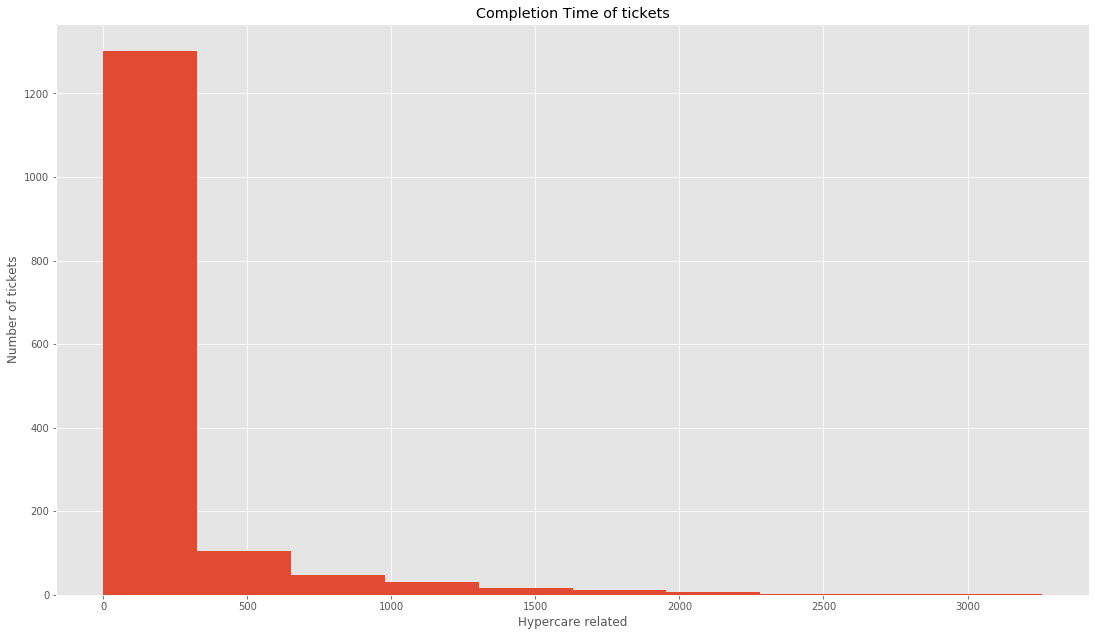

In [64]:
#Completion Time related histogram
plt.hist(t_data.iloc[:]["Completion Time"])
plt.ylabel("Number of tickets")
plt.xlabel("Hypercare related")
plt.title("Completion Time of tickets")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig(s_path+'Completion_Time.png', dpi=100)

array([  11,    1,    0, ...,   23,    1, 1142])

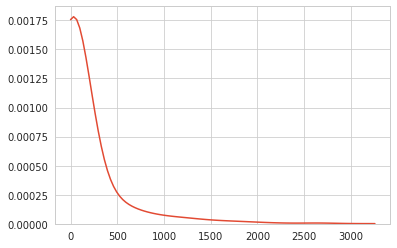

In [70]:
#

x = np.arange(0,1521)

y = np.array(t_data.iloc[:]["Completion Time"])


sns.set_style('whitegrid')
sns.kdeplot(y, bw=0.5)

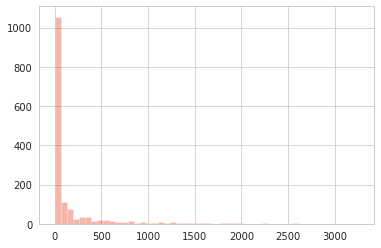

In [71]:
sns.distplot(y, kde = False)

In [75]:
t_data

,Number,Priority,Urgency,Supplier,State,Solution category,Skills,Severity,Resolved,Project related,...,Time worked,Made SLA,Hypercare related,Created by,Updated,External Reference,Unit,Problem number,Parent ID,Completion Time
0,INC836712,5,3,NaN,Pending,Explanation,NaN,3,2019-07-05 11:54:05,False,...,0,True,False,konieczk-1,05-07-2019 11:54:25,NaN,4602.0,NaN,NaN,11
1,INC836646,5,3,NaN,Pending,Parameter change,NaN,3,2019-07-04 21:09:02,False,...,0,True,False,willemse-2,04-07-2019 21:09:02,NaN,501.0,NaN,NaN,1
2,INC836620,5,3,NaN,Pending,Explanation,NaN,3,2019-07-04 18:55:55,False,...,0,True,False,konieczk-1,04-07-2019 19:01:30,NaN,4602.0,NaN,NaN,0
3,INC836541,5,3,NaN,Pending,Explanation,NaN,3,2019-07-04 16:10:13,False,...,0,True,False,vanister-1,04-07-2019 16:10:43,NaN,4602.0,NaN,NaN,0
5,INC836255,3,1,NaN,Pending,Explanation,NaN,3,2019-07-04 15:57:27,False,...,0,True,False,powierza-1,04-07-2019 15:57:27,NaN,4603.0,NaN,NaN,19
6,INC836200,5,3,NaN,Pending,Explanation,NaN,3,2019-07-03 20:07:56,False,...,0,True,False,michalsk-5,03-07-2019 20:08:16,NaN,4602.0,NaN,NaN,1
7,INC836165,5,3,NaN,Pending,Explanation,NaN,3,2019-07-03 18:27:17,False,...,0,True,False,kiselev-1,03-07-2019 18:28:34,NaN,105.0,NaN,NaN,1
8,INC835751,3,2,NaN,Pending,Explanation,NaN,3,2019-07-04 15:59:53,False,...,0,True,False,lotz-1,04-07-2019 15:59:53,NaN,101.0,NaN,NaN,44
9,INC835711,3,2,NaN,Pending,Explanation,NaN,3,2019-07-02 21:10:07,False,...,0,True,False,volk-1,02-07-2019 21:10:07,NaN,101.0,NaN,NaN,2
10,INC835592,4,2,NaN,Pending,Explanation,NaN,3,2019-07-02 15:40:00,False,...,0,True,False,mesekbon-1,02-07-2019 15:40:19,NaN,4602.0,NaN,NaN,0


In [74]:
list(t_data)

['Number',
 'Priority',
 'Urgency',
 'Supplier',
 'State',
 'Solution category',
 'Skills',
 'Severity',
 'Resolved',
 'Project related',
 'Opened',
 'Incident ID',
 'Impact',
 'Company',
 'Close code',
 'Incident state',
 'Reason for waiting',
 'Created',
 'Closed',
 'Caused by Change',
 'Escalation',
 'Category',
 'Subcategory',
 'Service Area',
 'Assignment group',
 'Change number',
 'Time worked',
 'Made SLA',
 'Hypercare related',
 'Created by',
 'Updated',
 'External Reference',
 'Unit',
 'Problem number',
 'Parent ID',
 'Completion Time']

In [76]:
t_data.drop(['Severity','Skills','Supplier', 'Resolved','Created', 'Closed', 'Updated', 'Time worked',], axis=1)

,Number,Priority,Urgency,State,Solution category,Project related,Opened,Incident ID,Impact,Company,...,Assignment group,Change number,Made SLA,Hypercare related,Created by,External Reference,Unit,Problem number,Parent ID,Completion Time
0,INC836712,5,3,Pending,Explanation,False,2019-07-04 23:59:57,INC836712,3,4602,...,ENT-SAP-SVC-MAN,NaN,True,False,konieczk-1,NaN,4602.0,NaN,NaN,11
1,INC836646,5,3,Pending,Parameter change,False,2019-07-04 19:32:03,INC836646,3,501,...,ENT-SAP-SVC-EXE,NaN,True,False,willemse-2,NaN,501.0,NaN,NaN,1
2,INC836620,5,3,Pending,Explanation,False,2019-07-04 18:29:44,INC836620,3,4602,...,ENT-SAP-SVC-MAN,NaN,True,False,konieczk-1,NaN,4602.0,NaN,NaN,0
3,INC836541,5,3,Pending,Explanation,False,2019-07-04 15:14:10,INC836541,3,4602,...,ENT-SAP-SVC-MAN,NaN,True,False,vanister-1,NaN,4602.0,NaN,NaN,0
5,INC836255,3,1,Pending,Explanation,False,2019-07-03 20:32:58,INC836255,3,4603,...,ENT-SAP-SVC-COC,NaN,True,False,powierza-1,NaN,4603.0,NaN,NaN,19
6,INC836200,5,3,Pending,Explanation,False,2019-07-03 18:53:36,INC836200,3,4602,...,ENT-SAP-SVC-MAN,NaN,True,False,michalsk-5,NaN,4602.0,NaN,NaN,1
7,INC836165,5,3,Pending,Explanation,False,2019-07-03 17:24:19,INC836165,3,105,...,ENT-SAP-SVC,NaN,True,False,kiselev-1,NaN,105.0,NaN,NaN,1
8,INC835751,3,2,Pending,Explanation,False,2019-07-02 19:43:18,INC835751,2,101,...,ENT-SAP-SVC-EXE,NaN,True,False,lotz-1,NaN,101.0,NaN,NaN,44
9,INC835711,3,2,Pending,Explanation,False,2019-07-02 19:00:59,INC835711,2,101,...,ENT-SAP-SVC-MAN,NaN,True,False,volk-1,NaN,101.0,NaN,NaN,2
10,INC835592,4,2,Pending,Explanation,False,2019-07-02 14:47:55,INC835592,3,4602,...,ENT-SAP-SVC-EXE,NaN,True,False,mesekbon-1,NaN,4602.0,NaN,NaN,0


In [ ]:
t_data.drop([], axis = 1)